In [1]:
# set up 
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim
seed = list(range(1,11))
seed_data = 10

import os

print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/snpla/seq-posterior-approx-w-nf-dev/mv_gaussian')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
import random 

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian/low_dim_w_five_obs
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/mv_gaussian


In [2]:
# set width to full screen 
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [82]:
# set style 
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1


# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True


In [69]:
seed_max = 10
nbr_rounds = 10

## Present results 

Set functions to load results 

In [70]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))


def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")



Load results 

In [71]:
smcabc_res = np.zeros((8, seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/results/abcsmc_' + id_job + '.txt'
    smcabc_res[:,i] = read_res_file(p)

In [72]:
nbr_rounds

10

In [73]:
snl_res = np.zeros((2+nbr_rounds,seed_max))

for i in range(1,seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/results/snl_' + id_job + '.txt'
    snl_res[:,i] = read_res_file(p)

In [74]:
snpe_c_res = np.zeros((2+nbr_rounds,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/results/snpec_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [75]:
snre_b_res = np.zeros((2+nbr_rounds,seed_max))

for i in range(1,seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/results/snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

In [76]:
snpla_res = np.zeros((2+nbr_rounds, seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/results/snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

In [57]:
snre_b_res[0,:]

array([   0.    , 2719.9218, 2503.9944, 2769.3593, 2607.69  , 2726.2179,
       2632.0873, 2731.4025, 2775.3612, 2364.3096])

In [58]:
snpla_res[0,:]

array([1305.2636, 1318.3409, 1283.3679, 1393.6364, 1330.1958, 1269.0575,
       1540.5092, 1426.0743, 1252.2519, 1094.3056])

Runtime (training) (sec)

In [53]:
print("SMC-ABC: " + str(np.median(smcabc_res[0,:]).round(3)))
print("SNL: " + str(np.median(snl_res[0,:]).round(3)))
print("SNPE-C: " + str(np.median(snpe_c_res[0,:]).round(3)))
print("SNPLA: " + str(np.median(snpla_res[0,:]).round(3)))
print("SNRE-B: " + str(np.median(snre_b_res[0,:]).round(3)))


SMC-ABC: 0.679
SNL: 7374.413
SNPE-C: 1179.943
SNPLA: 1311.802
SNRE-B: 2676.005


Runtime (inference, i.e. gen. 1000 samples from the res. posterior) (sec)

In [55]:
print("SMC-ABC: " + str(np.median(smcabc_res[1,:]).round(3)))
print("SNL: " + str(np.median(snl_res[1,:]).round(3)))
print("SNPE-C: " + str(np.median(snpe_c_res[1,:]).round(3)))
print("SNPLA: " + str(np.median(snpla_res[1,:]).round(3)))
print("SNRE-B: " + str(np.median(snre_b_res[1,:]).round(3)))


SMC-ABC: 0.001
SNL: 290.481
SNPE-C: 0.028
SNPLA: 0.027
SNRE-B: 96.784


In [14]:
print((np.median(snl_res[1,:])/np.median(snpla_res[1,:])).round(0))
print((np.median(snre_b_res[1,:])/np.median(snpla_res[1,:])).round(0))

10739.0
3578.0


KL div between res. approx. posterior and analytical posterior

In [13]:
print("SMC-ABC: " + str(smcabc_res[-1,:].mean().round(4)))
print("SNL: " + str(snl_res[-1,:].mean().round(4)))
print("SNPE-C: " + str(snpe_c_res[-1,:].mean().round(4)))
print("SNRE-B: " + str(snre_b_res[-1,:].mean().round(4)))
print("SNPLA: " + str(snpla_res[-1,:].mean().round(4)))


SMC-ABC: 0.6879
SNL: 0.0066
SNPE-C: 0.0195
SNRE-B: 0.0122
SNPLA: 0.009


Band plot for KL div

In [14]:
x_grid_abcsmc = [2500, 5000, 7500, 10000, 100000, 1000000]
x_grid = []
x_grid.append(2500)

for i in range(nbr_rounds-1):
    x_grid.append(x_grid[i] + 2500)
    
upper_q = 0.75
lower_w = 0.25

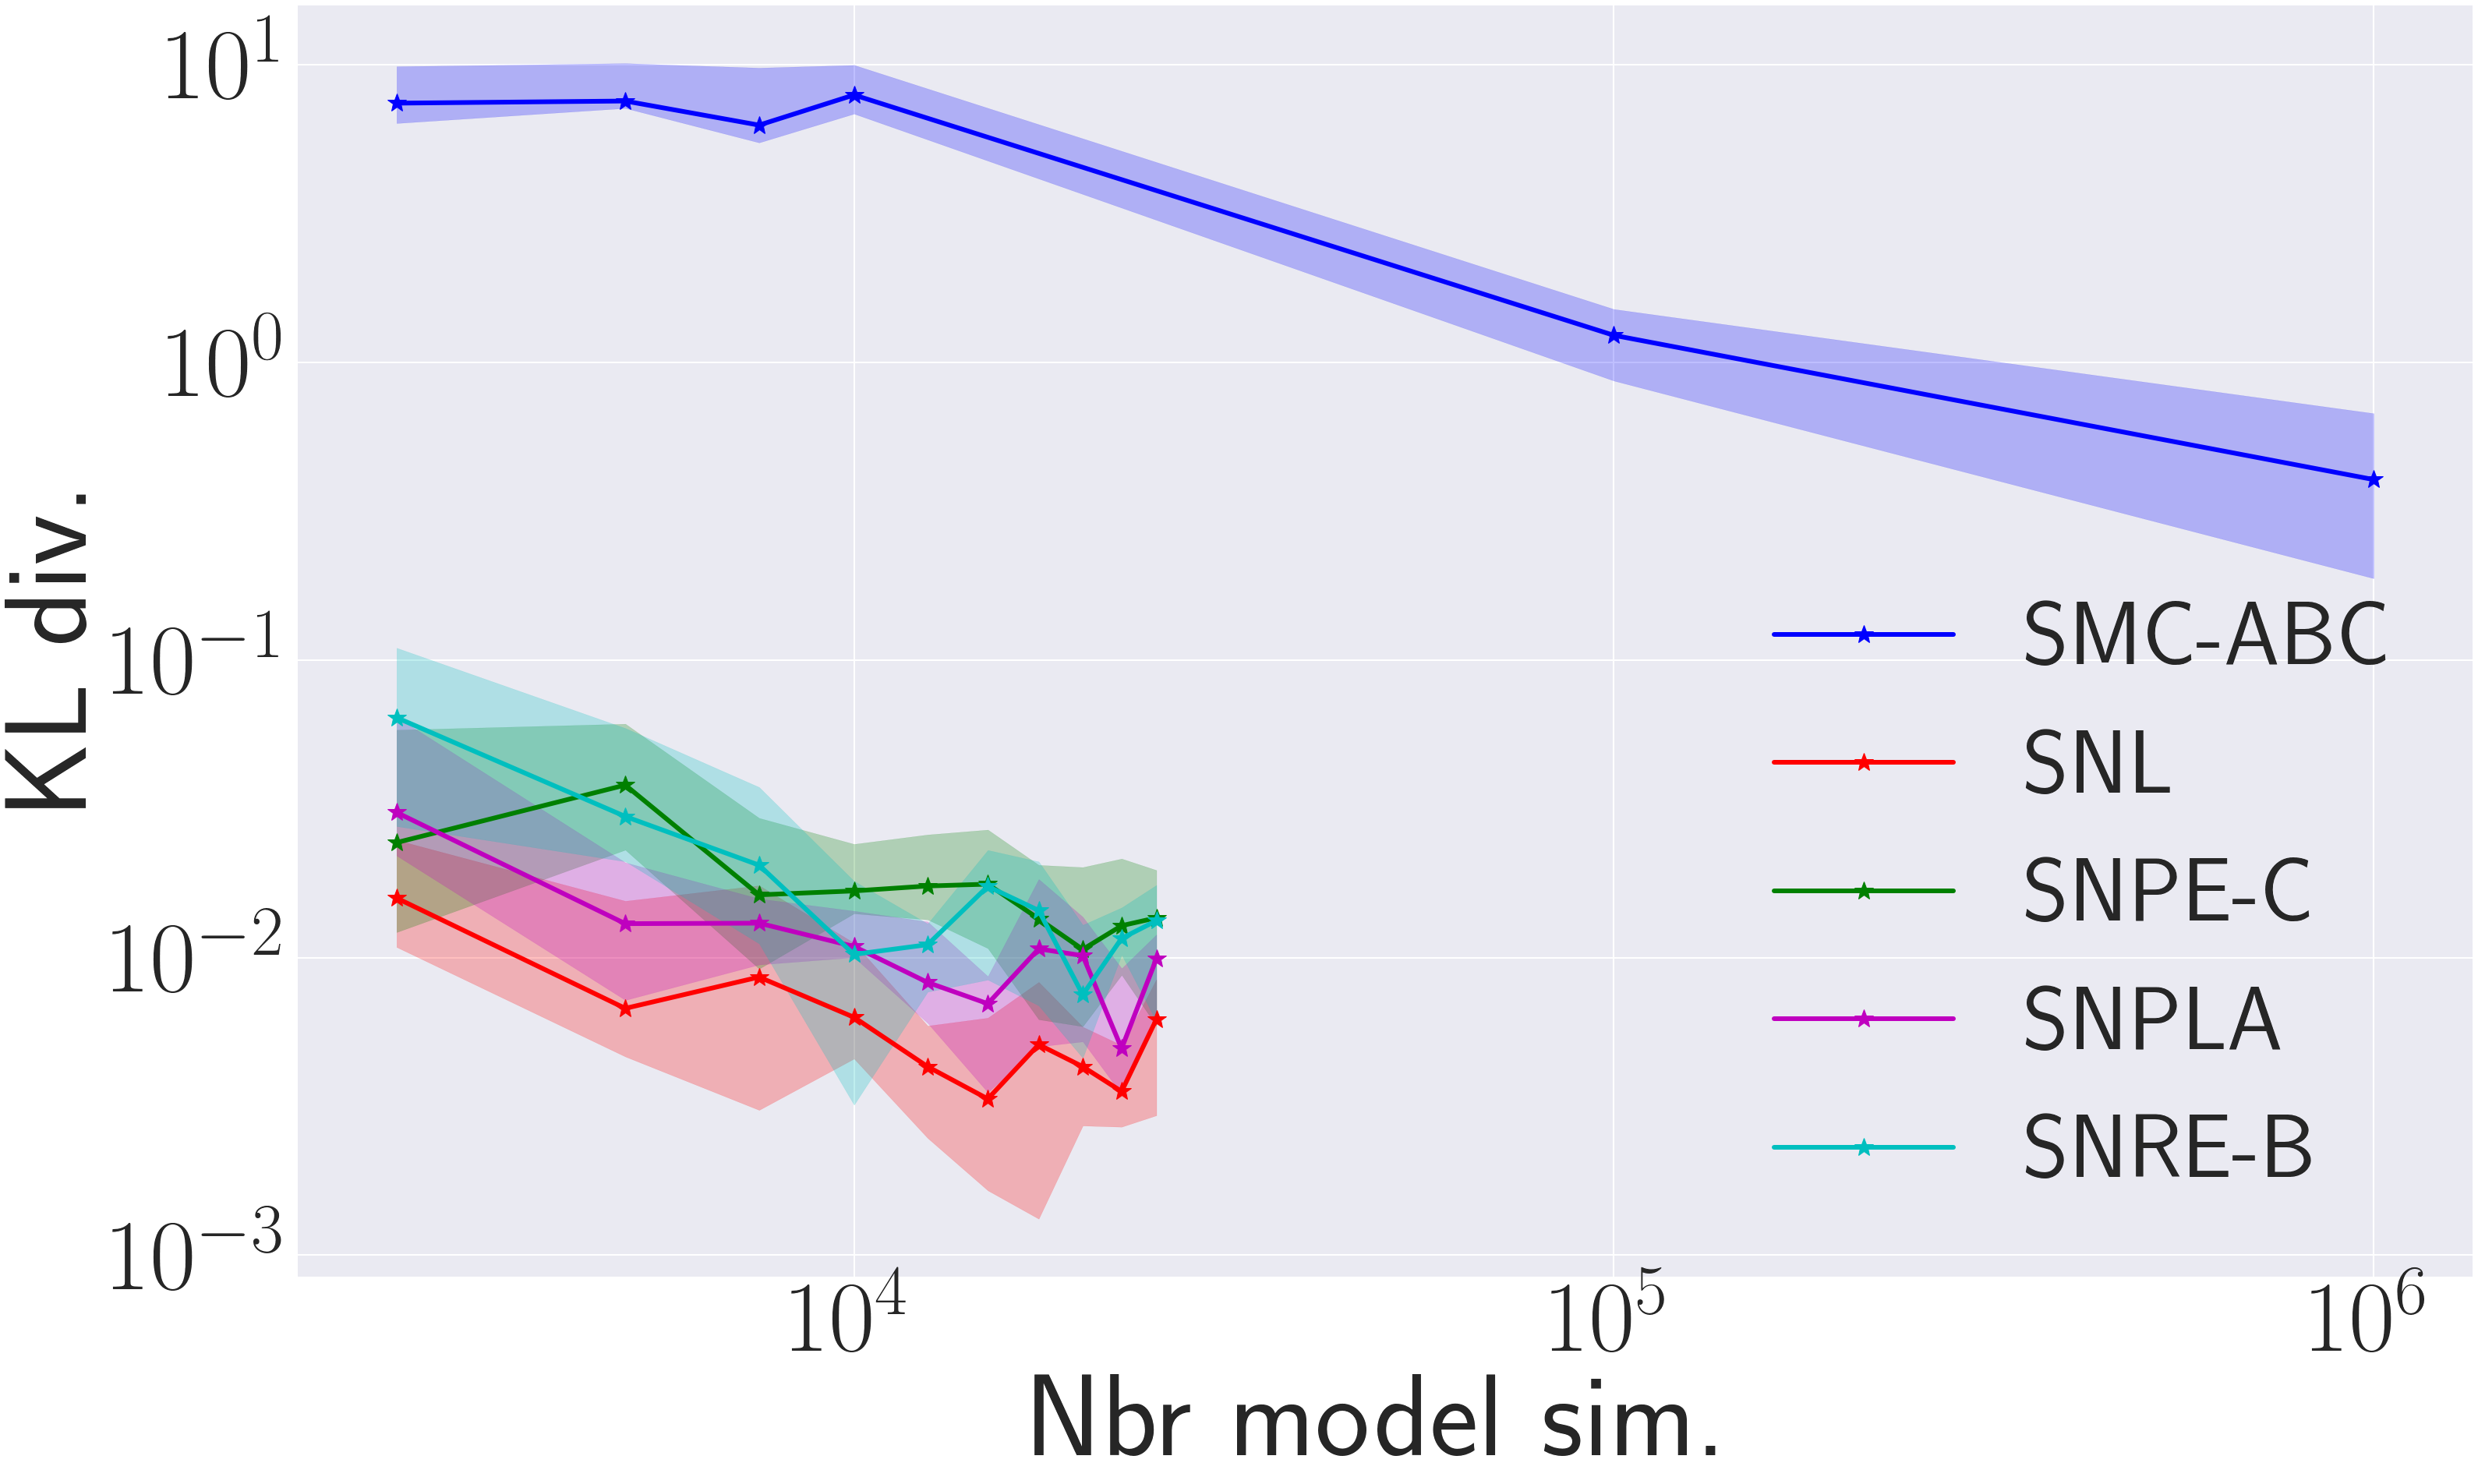

In [81]:
fig = plt.figure(figsize = (50,30))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(x_grid_abcsmc, np.median(smcabc_res[2:,:],axis = 1), color = "b",
         label='SMC-ABC',linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid_abcsmc, 
                np.quantile(smcabc_res[2:,:], lower_w, axis = 1), 
                np.quantile(smcabc_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "b")


ax.loglog(x_grid, np.median(snl_res[2:,:],axis = 1), color = "r",
         label='SNL', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snl_res[2:,:], lower_w, axis = 1), 
                np.quantile(snl_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "r")


ax.loglog(x_grid, np.median(snpe_c_res[2:,:],axis = 1), color = "g",
         label='SNPE-C', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snpe_c_res[2:,:], lower_w, axis = 1), 
                np.quantile(snpe_c_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "g")


ax.loglog(x_grid, np.median(snpla_res[2:,:],axis = 1), color = "m",
         label='SNPLA', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snpla_res[2:,:], lower_w, axis = 1), 
                np.quantile(snpla_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "m")

ax.loglog(x_grid, np.median(snre_b_res[2:,:],axis = 1), color = "c",
         label='SNRE-B', linewidth=6, marker = "*", markersize=25)
ax.fill_between(x_grid, 
                np.quantile(snre_b_res[2:,:], lower_w, axis = 1), 
                np.quantile(snre_b_res[2:,:], upper_q, axis = 1), 
                alpha = 0.25, color = "c")



ax.grid(color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='both', which='major', labelsize=130)
ax.tick_params(axis='both', which='minor', labelsize=130)
ax.legend(prop={'size': 115})
ax.set_ylabel("KL div.", fontsize=150)
ax.set_xlabel("Nbr model sim.", fontsize=150)
plt.savefig("./low_dim_w_five_obs/fig/mv_gauss_5_obs_kl_band_plot.pdf", format='pdf',
          bbox_inches = 'tight')

Nbr cases with NaNs

In [16]:
print("SMC-ABC: " + str(sum(np.isnan(smcabc_res[2,:]))))
print("SNL: " + str(sum(np.isnan(snl_res[2,:]))))
print("SNPE-C: " + str(sum(np.isnan(snpe_c_res[2,:]))))
print("SNRE-B: " + str(sum(np.isnan(snre_b_res[2,:]))))
print("snpla-Flow: " + str(sum(np.isnan(snpla_res[2,:]))))


SMC-ABC: 0
SNL: 0
SNPE-C: 0
SNRE-B: 0
snpla-Flow: 0


## Plotting - posterior

In [17]:
iter = 10

In [18]:
analytical_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/data/post_samples_analytical_' + id_job + '.csv'
    analytical_post.append(read_posterior_samples(p))

In [19]:
smcabc_post = []

iter_smc = 1000

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/data/abcsmc_posterior_' + str(iter_smc) + \
    "_" +  id_job + '.csv'
    smcabc_post.append(read_posterior_samples(p))

In [20]:
snl_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/data/snl_posterior_'  + str(iter) + \
    "_" + id_job + '.csv'
    snl_post.append(read_posterior_samples(p))

In [21]:
snpe_c_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/data/post_samples_snpec_'  + str(iter) + \
    "_" + id_job + '.csv'
    snpe_c_post.append(read_posterior_samples(p))

In [22]:
snpr_b_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/data/post_samples_snre_b_'  + str(iter) + \
    "_" + id_job + '.csv'
    snpr_b_post.append(read_posterior_samples(p))

In [23]:
snpla_post = []

for s in range(seed_max):
    id_job = str(dim) + '_' + str(s+1) + '_' + str(seed_data)
    p = 'low_dim_w_five_obs/data/post_samples_snpla_'  + str(iter) + \
    "_" + id_job + '.csv'
    snpla_post.append(read_posterior_samples(p))

Plot posterior samples

In [66]:
random.seed(1)

Res posterior for dataset: 2


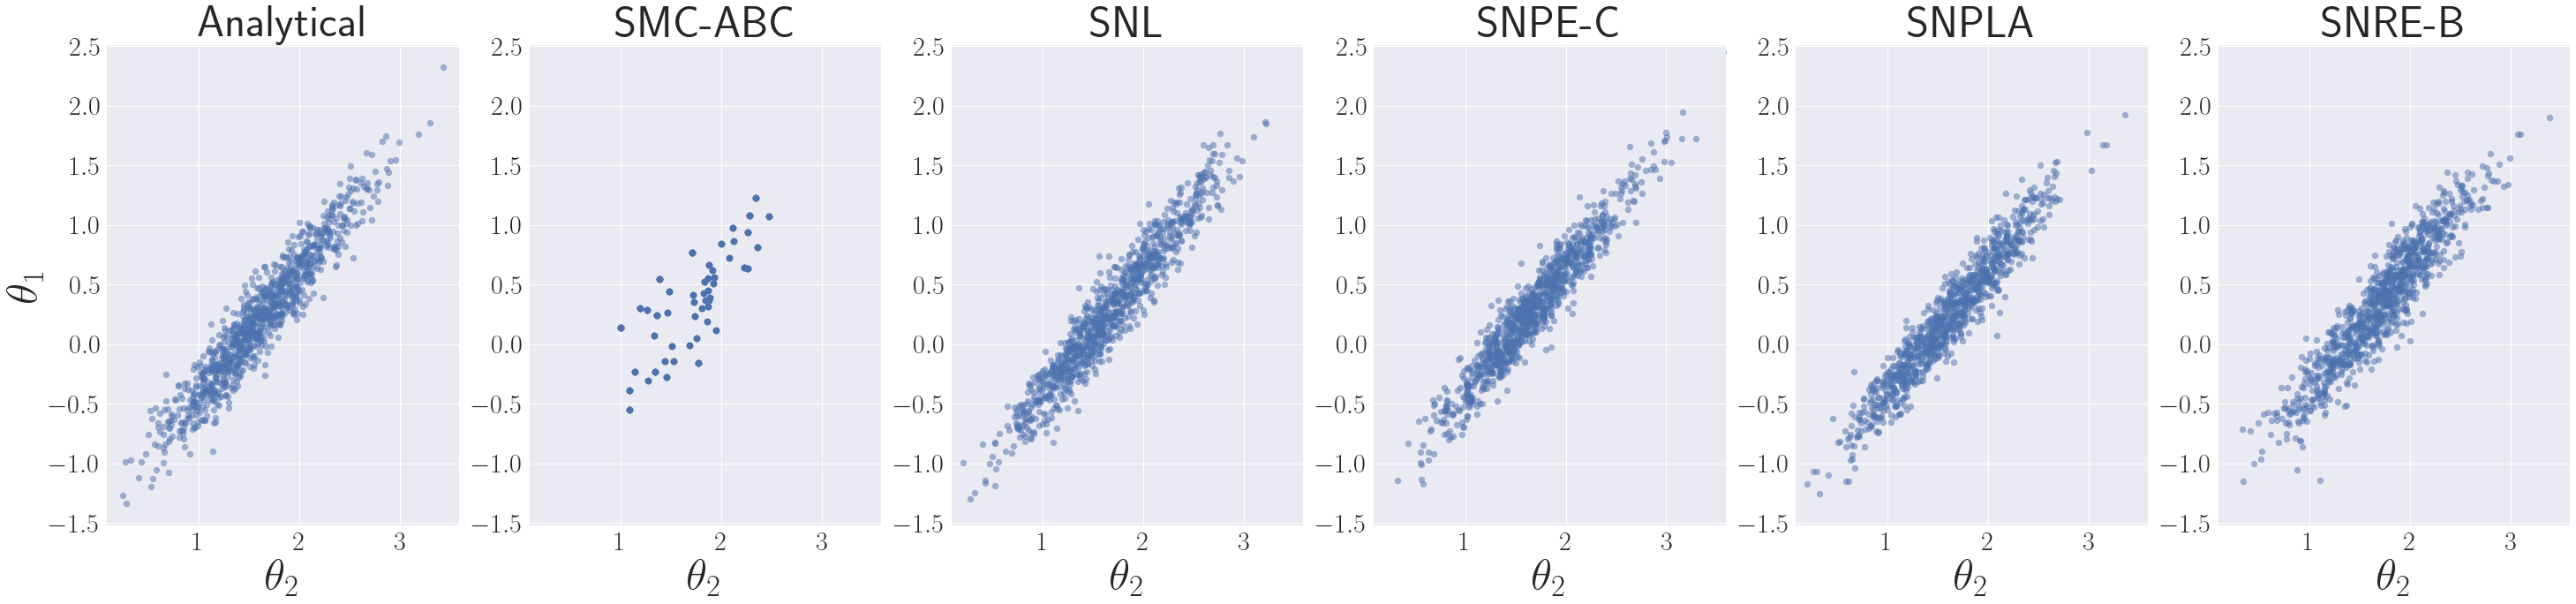

In [67]:
data_set =  random.randint(0, 9)

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 6, 1)
ax2 = fig.add_subplot(1, 6, 2, sharex=ax1) # why arent the axis fixed
ax3 = fig.add_subplot(1, 6, 3, sharex=ax1)
ax4 = fig.add_subplot(1, 6, 4, sharex=ax1)
ax5 = fig.add_subplot(1, 6, 5, sharex=ax1)
ax6 = fig.add_subplot(1, 6, 6, sharex=ax1)

ax1.scatter(analytical_post[data_set][:,0],analytical_post[data_set][:,1],alpha = 0.5)

ax2.scatter(smcabc_post[data_set][:,0],smcabc_post[data_set][:,1],alpha = 0.5)
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

ax3.scatter(snl_post[data_set][:,0],snl_post[data_set][:,1],alpha = 0.5)
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.scatter(snpe_c_post[data_set][:,0],snpe_c_post[data_set][:,1],alpha = 0.5)
ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax6.scatter(snpr_b_post[data_set][:,0],snpr_b_post[data_set][:,1],alpha = 0.5)
ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax5.scatter(snpla_post[data_set][:,0],snpla_post[data_set][:,1],alpha = 0.5)
ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax1.set_title("Analytical",fontsize=50)
ax2.set_title("SMC-ABC",fontsize=50)
ax3.set_title("SNL",fontsize=50)
ax4.set_title("SNPE-C",fontsize=50)
ax6.set_title("SNRE-B",fontsize=50)
ax5.set_title("SNPLA",fontsize=50)
#plt.savefig('2d w 5 obs/true_post_training_from_target_joint_approx_posteriors_plot_1.png')


ax1.set_ylabel(r'$\theta_1$',fontsize=50)

ax1.set_xlabel(r'$\theta_2$',fontsize=50)
ax2.set_xlabel(r'$\theta_2$',fontsize=50)
ax3.set_xlabel(r'$\theta_2$',fontsize=50)
ax4.set_xlabel(r'$\theta_2$',fontsize=50)
ax5.set_xlabel(r'$\theta_2$',fontsize=50)
ax6.set_xlabel(r'$\theta_2$',fontsize=50)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='minor', labelsize=25)

ax3.tick_params(axis='both', which='major', labelsize=30)
ax3.tick_params(axis='both', which='minor', labelsize=25)

ax4.tick_params(axis='both', which='major', labelsize=30)
ax4.tick_params(axis='both', which='minor', labelsize=25)

ax5.tick_params(axis='both', which='major', labelsize=30)
ax5.tick_params(axis='both', which='minor', labelsize=25)

ax6.tick_params(axis='both', which='major', labelsize=30)
ax6.tick_params(axis='both', which='minor', labelsize=25)

print("Res posterior for dataset: " + str(data_set))

file_name_base = "./low_dim_w_five_obs/fig/mv_gauss_5_obs_posterior_samples"
file_name_iter_data = "_" + str(iter) + "_" + str(data_set)
plt.savefig(file_name_base + file_name_iter_data + ".pdf")

Res posterior for dataset: 2


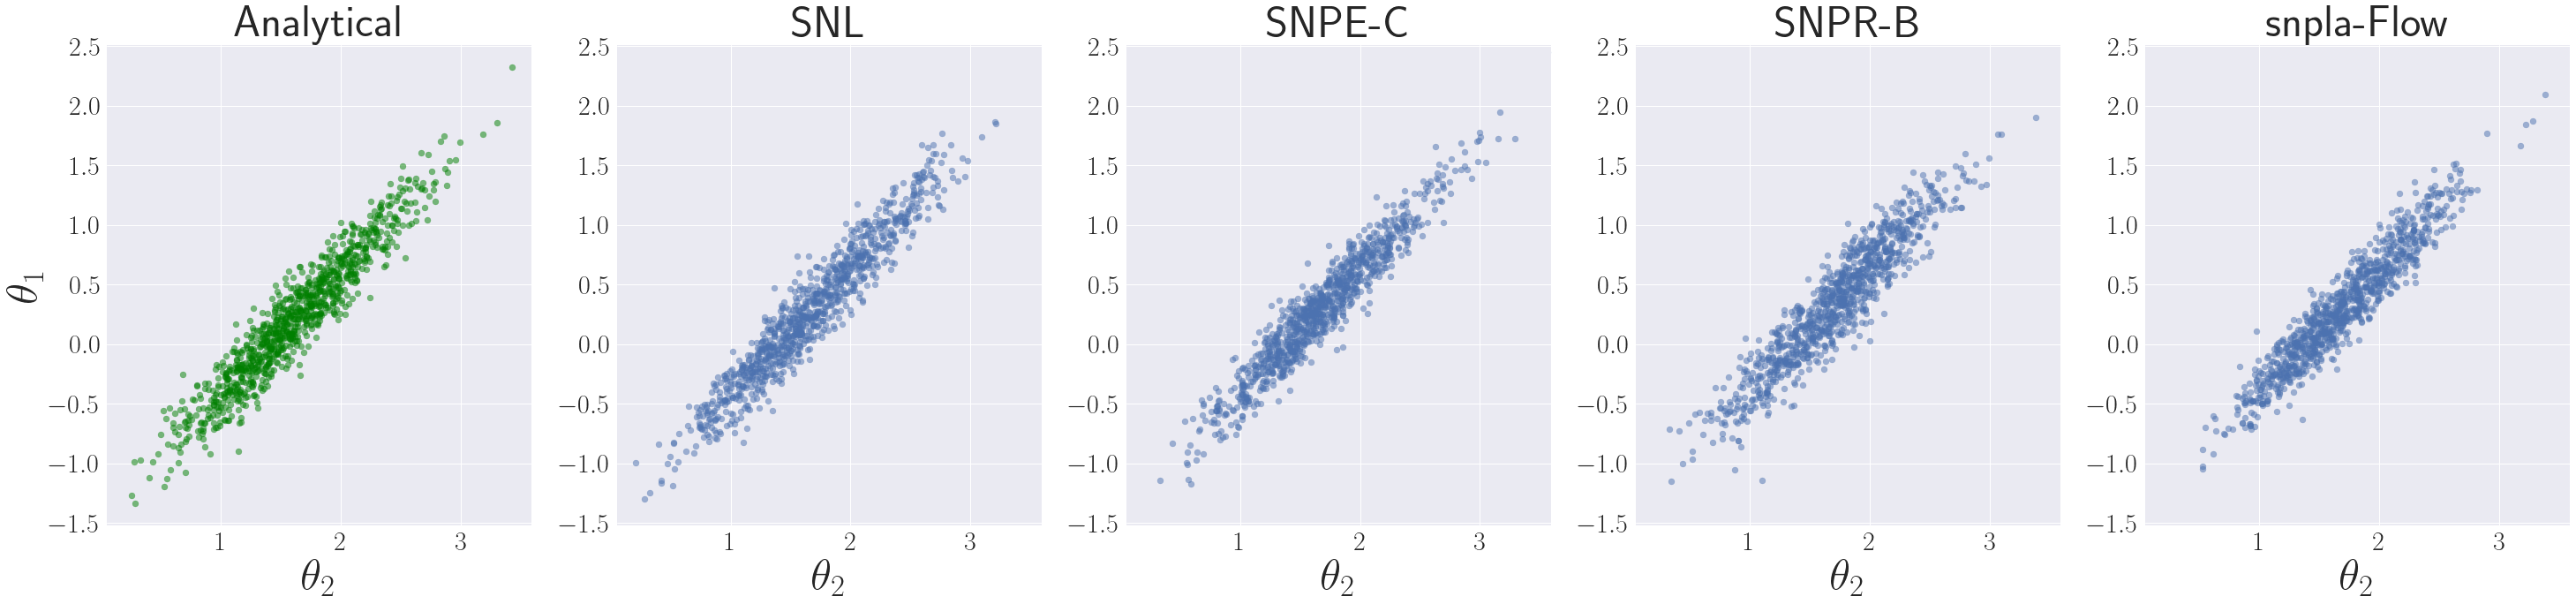

In [25]:

fig = plt.figure(figsize = (50,10))

ax1 = fig.add_subplot(1, 5, 1)
ax3 = fig.add_subplot(1, 5, 2, sharex=ax1)
ax4 = fig.add_subplot(1, 5, 3, sharex=ax1)
ax5 = fig.add_subplot(1, 5, 4, sharex=ax1)
ax6 = fig.add_subplot(1, 5, 5, sharex=ax1)

ax1.scatter(analytical_post[data_set][:,0],analytical_post[data_set][:,1],alpha = 0.5,color = "g")

ax3.scatter(snl_post[data_set][:,0],snl_post[data_set][:,1],alpha = 0.5)
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())

ax4.scatter(snpe_c_post[data_set][:,0],snpe_c_post[data_set][:,1],alpha = 0.5)
ax4.set_xlim(ax1.get_xlim())
ax4.set_ylim(ax1.get_ylim())

ax5.scatter(snpr_b_post[data_set][:,0],snpr_b_post[data_set][:,1],alpha = 0.5)
ax5.set_xlim(ax1.get_xlim())
ax5.set_ylim(ax1.get_ylim())

ax6.scatter(snpla_post[data_set][:,0],snpla_post[data_set][:,1],alpha = 0.5)
ax6.set_xlim(ax1.get_xlim())
ax6.set_ylim(ax1.get_ylim())

ax1.set_title("Analytical",fontsize=50)
ax2.set_title("SMC-ABC",fontsize=50)
ax3.set_title("SNL",fontsize=50)
ax4.set_title("SNPE-C",fontsize=50)
ax5.set_title("SNPR-B",fontsize=50)
ax6.set_title("snpla-Flow",fontsize=50)
#plt.savefig('2d w 5 obs/true_post_training_from_target_joint_approx_posteriors_plot_1.png')


ax1.set_ylabel(r'$\theta_1$',fontsize=50)

ax1.set_xlabel(r'$\theta_2$',fontsize=50)
ax2.set_xlabel(r'$\theta_2$',fontsize=50)
ax3.set_xlabel(r'$\theta_2$',fontsize=50)
ax4.set_xlabel(r'$\theta_2$',fontsize=50)
ax5.set_xlabel(r'$\theta_2$',fontsize=50)
ax6.set_xlabel(r'$\theta_2$',fontsize=50)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.tick_params(axis='both', which='minor', labelsize=25)

ax3.tick_params(axis='both', which='major', labelsize=30)
ax3.tick_params(axis='both', which='minor', labelsize=25)

ax4.tick_params(axis='both', which='major', labelsize=30)
ax4.tick_params(axis='both', which='minor', labelsize=25)

ax5.tick_params(axis='both', which='major', labelsize=30)
ax5.tick_params(axis='both', which='minor', labelsize=25)

ax6.tick_params(axis='both', which='major', labelsize=30)
ax6.tick_params(axis='both', which='minor', labelsize=25)

print("Res posterior for dataset: " + str(data_set))

file_name_base = "./low_dim_w_five_obs/fig/mv_gauss_5_obs_posterior_samples"
file_name_iter_data = "_" + str(iter) + "_" + str(data_set) + "_" + "wo_smcabc"
plt.savefig(file_name_base + file_name_iter_data + ".pdf")